In [145]:
import config
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import datetime
from utils.data_exploration_utils import drop_unnamedcolumn,  investigate_data, plot_hist, scatterplot, missing_from_df

In [146]:
today = datetime.date.today()

base_dir = config.RAW_DATA_PATH
proc_dir = config.PROC_DATA_PATH

folder = None

if folder is not None:
    save_dir = os.path.join(proc_dir, folder)
else:
    save_dir = os.path.join(proc_dir, f"{today}_data_exploration")

os.makedirs(save_dir, exist_ok=True)

file_name = 'questionnaires_raw.csv'

newfolder = "2025-07-28_data_exploration"
file =  "inmodi_data_personalinformation_kl_woSC.csv"

df = pd.read_csv(os.path.join(base_dir, file_name))
# kl = pd.read_csv(os.path.join(base_dir, 'brul_knee_annotations.csv'))
kl = pd.read_csv(os.path.join(proc_dir, newfolder, file))

In [147]:
print(df.shape)

(244, 86)


# Data Cleaning

In [148]:
try:
    df = drop_unnamedcolumn(df)
except Exception as e:
    print(f"Error dropping unnamed columns: {e}")

In [149]:
df['visit'] = df['redcap_event_name'].str.split('_').str[0].map({'first': 1, 'second': 2})
df['id_visit'] = df['record_id'].astype(str) + '_' + df['visit'].astype(str)

In [150]:
df_nanids = investigate_data(df, id_col='id_visit')

Column 'comi_knee_pain' has 35 missing values (209 out of 244 non-null).
Column 'comi_knee_2' has 35 missing values (209 out of 244 non-null).
Column 'comi_knee_sport' has 35 missing values (209 out of 244 non-null).
Column 'comi_knee_3' has 35 missing values (209 out of 244 non-null).
Column 'comi_knee_4' has 35 missing values (209 out of 244 non-null).
Column 'comi_knee_5' has 35 missing values (209 out of 244 non-null).
Column 'comi_knee_6' has 35 missing values (209 out of 244 non-null).
Column 'comi_knee_7a' has 101 missing values (143 out of 244 non-null).
Column 'comi_knee_compldescr' has 236 missing values (8 out of 244 non-null).
Column 'comi_knee_7b' has 236 missing values (8 out of 244 non-null).
Column 'comi_knee_8' has 101 missing values (143 out of 244 non-null).
Column 'comi_knee_otherjoint' has 237 missing values (7 out of 244 non-null).
Column 'comi_knee_9' has 101 missing values (143 out of 244 non-null).
Column 'comi_knee_10' has 101 missing values (143 out of 244 no

,record_id,redcap_event_name,comi_knee_pain,comi_knee_2,comi_knee_sport,comi_knee_3,comi_knee_4,comi_knee_5,comi_knee_6,comi_knee_7a,...,koos_sp3,koos_sp4,koos_sp5,koos_q1,koos_q2,koos_q3,koos_q4,proms_complete,visit,id_visit
0,IM0001,first_visit_arm_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,IM0001_1
1,IM0001,second_visit_arm_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,IM0001_2
2,IM0002,first_visit_arm_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,IM0002_1
3,IM0002,second_visit_arm_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,IM0002_2
4,IM0004,first_visit_arm_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,1,IM0004_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,IM3021,second_visit_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,IM3021_2
240,IM3022,first_visit_arm_1,5.0,7.5,10.0,10.0,7.5,10.0,0.0,NaN,...,4.0,4.0,4.0,3.0,3.0,4.0,4.0,2,1,IM3022_1
241,IM3022,second_visit_arm_1,2.0,2.5,5.0,10.0,5.0,10.0,0.0,NaN,...,3.0,3.0,4.0,4.0,2.0,2.0,2.0,2,2,IM3022_2
242,IM3023,first_visit_arm_1,7.0,7.5,7.5,10.0,5.0,7.5,999.0,NaN,...,4.0,3.0,4.0,3.0,4.0,3.0,3.0,2,1,IM3023_1



No duplicate rows based on id_visit.


In [151]:
df['proms_complete'].value_counts()

proms_complete
2    220
0     24
Name: count, dtype: int64

In [152]:
df[df['proms_complete']==0]

,record_id,redcap_event_name,comi_knee_pain,comi_knee_2,comi_knee_sport,comi_knee_3,comi_knee_4,comi_knee_5,comi_knee_6,comi_knee_7a,...,koos_sp3,koos_sp4,koos_sp5,koos_q1,koos_q2,koos_q3,koos_q4,proms_complete,visit,id_visit
19,IM0013,second_visit_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,IM0013_2
25,IM0016,second_visit_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,IM0016_2
39,IM0025,second_visit_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,IM0025_2
53,IM1029,second_visit_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,IM1029_2
64,IM1045,first_visit_arm_1,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,IM1045_1
67,IM1046,second_visit_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,IM1046_2
87,IM1526,second_visit_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,IM1526_2
89,IM1530,second_visit_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,IM1530_2
123,IM1600,second_visit_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,IM1600_2
164,IM2501,first_visit_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,IM2501_1


In [153]:
l = ['comi_knee_pain', 'comi_knee_2',
       'comi_knee_sport', 'comi_knee_3', 'comi_knee_4', 'comi_knee_5',
       'comi_knee_6', 'comi_knee_7a', 'comi_knee_compldescr', 'comi_knee_7b',
       'comi_knee_8', 'comi_knee_otherjoint', 'comi_knee_9', 'comi_knee_10',
       'comi_knee_painkiller', 'oks_q1', 'oks_q2', 'oks_q3', 'oks_q4',
       'oks_q5', 'oks_q6', 'oks_q7', 'oks_q8', 'oks_q9', 'oks_q10', 'oks_q11',
       'oks_q12', 'ucla', 'fjs_q1', 'fjs_q2', 'fjs_q3', 'fjs_q4', 'fjs_q5',
       'fjs_q6', 'fjs_q7', 'fjs_q8', 'fjs_q9', 'fjs_q10', 'fjs_q11', 'fjs_q12',
       'koos_s1', 'koos_s2', 'koos_s3', 'koos_s4', 'koos_s5', 'koos_s6',
       'koos_s7', 'koos_p1', 'koos_p2', 'koos_p3', 'koos_p4', 'koos_p5',
       'koos_p6', 'koos_p7', 'koos_p8', 'koos_p9', 'koos_a1', 'koos_a2',
       'koos_a3', 'koos_a4', 'koos_a5', 'koos_a6', 'koos_a7', 'koos_a8',
       'koos_a9', 'koos_a10', 'koos_a11', 'koos_a12', 'koos_a13', 'koos_a14',
       'koos_a15', 'koos_a16', 'koos_a17', 'koos_sp1', 'koos_sp2', 'koos_sp3',
       'koos_sp4', 'koos_sp5', 'koos_q1', 'koos_q2', 'koos_q3', 'koos_q4']

print(f"Number of samples where no PROM values available: {len(df[df[l].isna().all(axis=1)])}")

l = [ 'oks_q1', 'oks_q2', 'oks_q3', 'oks_q4',
       'oks_q5', 'oks_q6', 'oks_q7', 'oks_q8', 'oks_q9', 'oks_q10', 'oks_q11',
       'oks_q12', 'ucla', 'fjs_q1', 'fjs_q2', 'fjs_q3', 'fjs_q4', 'fjs_q5',
       'fjs_q6', 'fjs_q7', 'fjs_q8', 'fjs_q9', 'fjs_q10', 'fjs_q11', 'fjs_q12',
       'koos_s1', 'koos_s2', 'koos_s3', 'koos_s4', 'koos_s5', 'koos_s6',
       'koos_s7', 'koos_p1', 'koos_p2', 'koos_p3', 'koos_p4', 'koos_p5',
       'koos_p6', 'koos_p7', 'koos_p8', 'koos_p9', 'koos_a1', 'koos_a2',
       'koos_a3', 'koos_a4', 'koos_a5', 'koos_a6', 'koos_a7', 'koos_a8',
       'koos_a9', 'koos_a10', 'koos_a11', 'koos_a12', 'koos_a13', 'koos_a14',
       'koos_a15', 'koos_a16', 'koos_a17', 'koos_sp1', 'koos_sp2', 'koos_sp3',
       'koos_sp4', 'koos_sp5', 'koos_q1', 'koos_q2', 'koos_q3', 'koos_q4']

print(f"Number of samples where no PROM values available (excl. COMI): {len(df[df[l].isna().all(axis=1)])}")

Number of samples where no PROM values available: 22
Number of samples where no PROM values available (excl. COMI): 22


In [154]:
# Remove samples where no PROM values are available
df = df[~df[l].isna().all(axis=1)]
df = df.reset_index()

In [155]:
print(df.shape)

(222, 88)


In [156]:
#find column names where nan values
for col in df[df['proms_complete']==0].columns:
    if df[df['proms_complete']==0][col].isna().any():
        print(col)



comi_knee_7a
comi_knee_compldescr
comi_knee_7b
comi_knee_8
comi_knee_otherjoint
comi_knee_9
comi_knee_10


# Questionnaire

## Core Outcome Measures Index (COMI)

In [157]:
base_col = ['record_id', 'redcap_event_name', 'proms_complete', 'id_visit']
comi_col = ['comi_knee_pain', 'comi_knee_2',
       'comi_knee_sport', 'comi_knee_3', 'comi_knee_4', 'comi_knee_5',
       'comi_knee_6', 'comi_knee_7a', 'comi_knee_compldescr', 'comi_knee_7b',
       'comi_knee_8', 'comi_knee_otherjoint', 'comi_knee_9', 'comi_knee_10',
       'comi_knee_painkiller']

comi = df[base_col + comi_col].copy()
display(comi.head())

,record_id,redcap_event_name,proms_complete,id_visit,comi_knee_pain,comi_knee_2,comi_knee_sport,comi_knee_3,comi_knee_4,comi_knee_5,comi_knee_6,comi_knee_7a,comi_knee_compldescr,comi_knee_7b,comi_knee_8,comi_knee_otherjoint,comi_knee_9,comi_knee_10,comi_knee_painkiller
0,IM0001,first_visit_arm_1,2,IM0001_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IM0001,second_visit_arm_1,2,IM0001_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IM0002,first_visit_arm_1,2,IM0002_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IM0002,second_visit_arm_1,2,IM0002_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IM0004,first_visit_arm_1,2,IM0004_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
comi['comi_knee_7a'].value_counts()

comi_knee_7a
0.0    135
1.0      8
Name: count, dtype: int64

In [159]:
_ = investigate_data(comi, id_col='id_visit')

Column 'comi_knee_pain' has 13 missing values (209 out of 222 non-null).
Column 'comi_knee_2' has 13 missing values (209 out of 222 non-null).
Column 'comi_knee_sport' has 13 missing values (209 out of 222 non-null).
Column 'comi_knee_3' has 13 missing values (209 out of 222 non-null).
Column 'comi_knee_4' has 13 missing values (209 out of 222 non-null).
Column 'comi_knee_5' has 13 missing values (209 out of 222 non-null).
Column 'comi_knee_6' has 13 missing values (209 out of 222 non-null).
Column 'comi_knee_7a' has 79 missing values (143 out of 222 non-null).
Column 'comi_knee_compldescr' has 214 missing values (8 out of 222 non-null).
Column 'comi_knee_7b' has 214 missing values (8 out of 222 non-null).
Column 'comi_knee_8' has 79 missing values (143 out of 222 non-null).
Column 'comi_knee_otherjoint' has 215 missing values (7 out of 222 non-null).
Column 'comi_knee_9' has 79 missing values (143 out of 222 non-null).
Column 'comi_knee_10' has 79 missing values (143 out of 222 non-nu

,record_id,redcap_event_name,proms_complete,id_visit,comi_knee_pain,comi_knee_2,comi_knee_sport,comi_knee_3,comi_knee_4,comi_knee_5,comi_knee_6,comi_knee_7a,comi_knee_compldescr,comi_knee_7b,comi_knee_8,comi_knee_otherjoint,comi_knee_9,comi_knee_10,comi_knee_painkiller
0,IM0001,first_visit_arm_1,2,IM0001_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IM0001,second_visit_arm_1,2,IM0001_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IM0002,first_visit_arm_1,2,IM0002_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IM0002,second_visit_arm_1,2,IM0002_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IM0004,first_visit_arm_1,2,IM0004_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,IM3021,first_visit_arm_1,2,IM3021_1,4.0,5.0,10.0,5.0,5.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
218,IM3022,first_visit_arm_1,2,IM3022_1,5.0,7.5,10.0,10.0,7.5,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
219,IM3022,second_visit_arm_1,2,IM3022_2,2.0,2.5,5.0,10.0,5.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
220,IM3023,first_visit_arm_1,2,IM3023_1,7.0,7.5,7.5,10.0,5.0,7.5,999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0



No duplicate rows based on id_visit.


## Oxford Knee Score (OKS)

In [160]:
oks_col = ['oks_q1', 'oks_q2', 'oks_q3', 'oks_q4',
       'oks_q5', 'oks_q6', 'oks_q7', 'oks_q8', 'oks_q9', 'oks_q10', 'oks_q11',
       'oks_q12']
oks = df[base_col + oks_col].copy()
display(oks.head())

,record_id,redcap_event_name,proms_complete,id_visit,oks_q1,oks_q2,oks_q3,oks_q4,oks_q5,oks_q6,oks_q7,oks_q8,oks_q9,oks_q10,oks_q11,oks_q12
0,IM0001,first_visit_arm_1,2,IM0001_1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1,IM0001,second_visit_arm_1,2,IM0001_2,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,IM0002,first_visit_arm_1,2,IM0002_1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,IM0002,second_visit_arm_1,2,IM0002_2,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,IM0004,first_visit_arm_1,2,IM0004_1,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0


In [161]:
_ = investigate_data(oks, id_col='id_visit')

Column 'oks_q1' has 1 missing values (221 out of 222 non-null).
Column 'oks_q2' has 1 missing values (221 out of 222 non-null).
Column 'oks_q3' has 1 missing values (221 out of 222 non-null).
Column 'oks_q4' has 1 missing values (221 out of 222 non-null).
Column 'oks_q5' has 1 missing values (221 out of 222 non-null).
Column 'oks_q6' has 1 missing values (221 out of 222 non-null).
Column 'oks_q7' has 1 missing values (221 out of 222 non-null).
Column 'oks_q8' has 1 missing values (221 out of 222 non-null).
Column 'oks_q9' has 1 missing values (221 out of 222 non-null).
Column 'oks_q10' has 1 missing values (221 out of 222 non-null).
Column 'oks_q11' has 1 missing values (221 out of 222 non-null).
Column 'oks_q12' has 1 missing values (221 out of 222 non-null).

Columns with NaN values:  ['oks_q1', 'oks_q2', 'oks_q3', 'oks_q4', 'oks_q5', 'oks_q6', 'oks_q7', 'oks_q8', 'oks_q9', 'oks_q10', 'oks_q11', 'oks_q12']

NaN values per column:
oks_q1     1
oks_q2     1
oks_q3     1
oks_q4     1
ok

,record_id,redcap_event_name,proms_complete,id_visit,oks_q1,oks_q2,oks_q3,oks_q4,oks_q5,oks_q6,oks_q7,oks_q8,oks_q9,oks_q10,oks_q11,oks_q12
204,IM3012,first_visit_arm_1,2,IM3012_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



No duplicate rows based on id_visit.


In [162]:
#so could filter out index 224

## UCLA (Aktivitätsindex)

In [163]:
ucla = df[base_col + ['ucla']].copy()
display(ucla.head())

,record_id,redcap_event_name,proms_complete,id_visit,ucla
0,IM0001,first_visit_arm_1,2,IM0001_1,9.0
1,IM0001,second_visit_arm_1,2,IM0001_2,8.0
2,IM0002,first_visit_arm_1,2,IM0002_1,9.0
3,IM0002,second_visit_arm_1,2,IM0002_2,8.0
4,IM0004,first_visit_arm_1,2,IM0004_1,7.0


In [164]:
_ = investigate_data(ucla, id_col='id_visit')

Column 'ucla' has 1 missing values (221 out of 222 non-null).

Columns with NaN values:  ['ucla']

NaN values per column:
ucla    1
dtype: int64


,record_id,redcap_event_name,proms_complete,id_visit,ucla
204,IM3012,first_visit_arm_1,2,IM3012_1,NaN



No duplicate rows based on id_visit.


## Forgotten Joint Score (FJS-12)

In [165]:
fjs_col = ['fjs_q1', 'fjs_q2', 'fjs_q3', 'fjs_q4', 'fjs_q5',
       'fjs_q6', 'fjs_q7', 'fjs_q8', 'fjs_q9', 'fjs_q10', 'fjs_q11', 'fjs_q12']
fjs = df[base_col + fjs_col].copy()
display(fjs.head())

,record_id,redcap_event_name,proms_complete,id_visit,fjs_q1,fjs_q2,fjs_q3,fjs_q4,fjs_q5,fjs_q6,fjs_q7,fjs_q8,fjs_q9,fjs_q10,fjs_q11,fjs_q12
0,IM0001,first_visit_arm_1,2,IM0001_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0
1,IM0001,second_visit_arm_1,2,IM0001_2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,IM0002,first_visit_arm_1,2,IM0002_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0
3,IM0002,second_visit_arm_1,2,IM0002_2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0
4,IM0004,first_visit_arm_1,2,IM0004_1,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0


In [166]:
_ = investigate_data(fjs, id_col='id_visit')


Columns with NaN values:  []

NaN values per column:
Series([], dtype: int64)
No duplicate rows based on id_visit.


## Knee Injury and Osteoarthritis Outcome Score (KOOS)

In [167]:
koos_col = ['koos_s1', 'koos_s2', 'koos_s3', 'koos_s4', 'koos_s5', 'koos_s6',
       'koos_s7', 'koos_p1', 'koos_p2', 'koos_p3', 'koos_p4', 'koos_p5',
       'koos_p6', 'koos_p7', 'koos_p8', 'koos_p9', 'koos_a1', 'koos_a2',
       'koos_a3', 'koos_a4', 'koos_a5', 'koos_a6', 'koos_a7', 'koos_a8',
       'koos_a9', 'koos_a10', 'koos_a11', 'koos_a12', 'koos_a13', 'koos_a14',
       'koos_a15', 'koos_a16', 'koos_a17', 'koos_sp1', 'koos_sp2', 'koos_sp3',
       'koos_sp4', 'koos_sp5', 'koos_q1', 'koos_q2', 'koos_q3', 'koos_q4']

koos = df[base_col + koos_col].copy()
display(koos.head())

,record_id,redcap_event_name,proms_complete,id_visit,koos_s1,koos_s2,koos_s3,koos_s4,koos_s5,koos_s6,...,koos_a17,koos_sp1,koos_sp2,koos_sp3,koos_sp4,koos_sp5,koos_q1,koos_q2,koos_q3,koos_q4
0,IM0001,first_visit_arm_1,2,IM0001_1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IM0001,second_visit_arm_1,2,IM0001_2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IM0002,first_visit_arm_1,2,IM0002_1,0.0,0.0,0.0,4.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IM0002,second_visit_arm_1,2,IM0002_2,0.0,1.0,0.0,4.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,IM0004,first_visit_arm_1,2,IM0004_1,0.0,3.0,0.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [168]:
_ = investigate_data(koos, id_col='id_visit')

Column 'koos_p1' has 1 missing values (221 out of 222 non-null).
Column 'koos_p9' has 1 missing values (221 out of 222 non-null).
Column 'koos_a4' has 1 missing values (221 out of 222 non-null).
Column 'koos_a13' has 1 missing values (221 out of 222 non-null).

Columns with NaN values:  ['koos_p1', 'koos_p9', 'koos_a4', 'koos_a13']

NaN values per column:
koos_p1     1
koos_p9     1
koos_a4     1
koos_a13    1
dtype: int64


,record_id,redcap_event_name,proms_complete,id_visit,koos_s1,koos_s2,koos_s3,koos_s4,koos_s5,koos_s6,...,koos_a17,koos_sp1,koos_sp2,koos_sp3,koos_sp4,koos_sp5,koos_q1,koos_q2,koos_q3,koos_q4
204,IM3012,first_visit_arm_1,2,IM3012_1,3.0,3.0,0.0,4.0,0.0,2.0,...,1.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0



No duplicate rows based on id_visit.


In [169]:
df.shape

(222, 88)

In [170]:
df_filtered = df.copy()
df.iloc[204, :]
df_filtered = df_filtered.drop(index=204)


In [171]:
_ = investigate_data(df_filtered)

Column 'comi_knee_pain' has 12 missing values (209 out of 221 non-null).
Column 'comi_knee_2' has 12 missing values (209 out of 221 non-null).
Column 'comi_knee_sport' has 12 missing values (209 out of 221 non-null).
Column 'comi_knee_3' has 12 missing values (209 out of 221 non-null).
Column 'comi_knee_4' has 12 missing values (209 out of 221 non-null).
Column 'comi_knee_5' has 12 missing values (209 out of 221 non-null).
Column 'comi_knee_6' has 12 missing values (209 out of 221 non-null).
Column 'comi_knee_7a' has 78 missing values (143 out of 221 non-null).
Column 'comi_knee_compldescr' has 213 missing values (8 out of 221 non-null).
Column 'comi_knee_7b' has 213 missing values (8 out of 221 non-null).
Column 'comi_knee_8' has 78 missing values (143 out of 221 non-null).
Column 'comi_knee_otherjoint' has 214 missing values (7 out of 221 non-null).
Column 'comi_knee_9' has 78 missing values (143 out of 221 non-null).
Column 'comi_knee_10' has 78 missing values (143 out of 221 non-nu

,index,record_id,redcap_event_name,comi_knee_pain,comi_knee_2,comi_knee_sport,comi_knee_3,comi_knee_4,comi_knee_5,comi_knee_6,...,koos_sp3,koos_sp4,koos_sp5,koos_q1,koos_q2,koos_q3,koos_q4,proms_complete,visit,id_visit
0,0,IM0001,first_visit_arm_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,IM0001_1
1,1,IM0001,second_visit_arm_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,IM0001_2
2,2,IM0002,first_visit_arm_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,IM0002_1
3,3,IM0002,second_visit_arm_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,IM0002_2
4,4,IM0004,first_visit_arm_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,1,IM0004_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,238,IM3021,first_visit_arm_1,4.0,5.0,10.0,5.0,5.0,10.0,0.0,...,4.0,4.0,4.0,3.0,2.0,2.0,3.0,2,1,IM3021_1
218,240,IM3022,first_visit_arm_1,5.0,7.5,10.0,10.0,7.5,10.0,0.0,...,4.0,4.0,4.0,3.0,3.0,4.0,4.0,2,1,IM3022_1
219,241,IM3022,second_visit_arm_1,2.0,2.5,5.0,10.0,5.0,10.0,0.0,...,3.0,3.0,4.0,4.0,2.0,2.0,2.0,2,2,IM3022_2
220,242,IM3023,first_visit_arm_1,7.0,7.5,7.5,10.0,5.0,7.5,999.0,...,4.0,3.0,4.0,3.0,4.0,3.0,3.0,2,1,IM3023_1



Duplicate rows based on record_id:


,index,record_id,redcap_event_name,comi_knee_pain,comi_knee_2,comi_knee_sport,comi_knee_3,comi_knee_4,comi_knee_5,comi_knee_6,...,koos_sp3,koos_sp4,koos_sp5,koos_q1,koos_q2,koos_q3,koos_q4,proms_complete,visit,id_visit
0,0,IM0001,first_visit_arm_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,IM0001_1
1,1,IM0001,second_visit_arm_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,IM0001_2
2,2,IM0002,first_visit_arm_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,IM0002_1
3,3,IM0002,second_visit_arm_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,IM0002_2
4,4,IM0004,first_visit_arm_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,1,IM0004_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,235,IM3019,second_visit_arm_1,1.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,2.0,0.0,0.0,2,2,IM3019_2
218,240,IM3022,first_visit_arm_1,5.0,7.5,10.0,10.0,7.5,10.0,0.0,...,4.0,4.0,4.0,3.0,3.0,4.0,4.0,2,1,IM3022_1
219,241,IM3022,second_visit_arm_1,2.0,2.5,5.0,10.0,5.0,10.0,0.0,...,3.0,3.0,4.0,4.0,2.0,2.0,2.0,2,2,IM3022_2
220,242,IM3023,first_visit_arm_1,7.0,7.5,7.5,10.0,5.0,7.5,999.0,...,4.0,3.0,4.0,3.0,4.0,3.0,3.0,2,1,IM3023_1


# KL Scores

So the issue that arises, is that the questionnaire is per patient and per visit, but not per knee. This means that patients that might have one healthy and one unhealthy knee, might have filled out the questionnaire only for their bad knee, which if we use the questionnaire for the healthy knee to question, could mean it introduces a wrong bias into the data. Therefore we need to investigate:
* how many patients have a big gap between their left and right knee?
* What effect does this have on their questionnaire data?
* What do we do about this?
* Was this already an issue in our low granularity data?

In [172]:
kl['id_visit'] = kl['name'].str.split('_').str[0] + '_' + kl['name'].str.split('_').str[1]

In [173]:
# Get id_visit where KL-Score difference is larger than 2
kl_diffs = kl.groupby('id_visit')['KL-Score'].agg(['min', 'max'])
kl_diffs['diff'] = kl_diffs['max'] - kl_diffs['min']
kl_diffs_index = kl_diffs[kl_diffs['diff'] >= 2].index

kl[kl['id_visit'].isin(kl_diffs_index)]

,record_id,visit,side,pain,age,ce_height,ce_weight,ce_bmi,ce_fm,gender,...,UCLA_score,FJS_score,KOOS_pain,KOOS_symptoms,KOOS_sport,KOOS_adl,KOOS_qol,name,KL-Score,id_visit
80,IM2511,1,l,0.0,41,174.0,78.7,26.0,22.3,male,...,10.0,27.083333,92.0,57.0,75.0,100.0,62.0,IM2511_1_left,0.0,IM2511_1
278,IM2511,1,r,0.0,41,174.0,78.7,26.0,22.3,male,...,10.0,27.083333,92.0,57.0,75.0,100.0,62.0,IM2511_1_right,2.0,IM2511_1


In [174]:
# kl[['record_id', 'visit', 'side']] = kl['name'].str.split('_', expand=True)
# kl_pivot = kl.pivot(index=['record_id', 'visit'], columns = 'side', values='KL-Score').reset_index()
# kl_pivot['diff'] = (kl_pivot['left']-kl_pivot['right']).abs()
# display(kl_pivot[kl_pivot['diff']>1])

In [175]:
# sc1 = kl_pivot[(kl_pivot['diff']>1) & (kl_pivot['left']==2.0) & (kl_pivot['right']>kl_pivot['left'])]
# display(sc1)

# sc2 = kl_pivot[(kl_pivot['diff']>1) & (kl_pivot['right']==2.0) & (kl_pivot['left']>kl_pivot['right'])]
# display(sc2)

In [176]:
# kl_pivot = kl_pivot[kl_pivot['diff']>1]

## Remove all even special cases

In [177]:
# kl_pivot['side'] = kl_pivot.apply(lambda x: 'l' if x['left']>x['right'] else 'r', axis=1)

In [178]:
# kl_pivot['tbr'] = kl_pivot.apply(lambda x: 'l' if x['side']=='r' else 'r', axis = 1)
# kl_pivot['visit'] = kl_pivot['visit'].astype(int)

In [179]:
# newfolder = "2025-07-28_data_exploration"
# file =  "inmodi_data_personalinformation_kl_woSC.csv"

# kl_df = pd.read_csv(os.path.join(proc_dir, newfolder, file))
# kl_df.head()

In [180]:
# df_filtered2 = df_filtered.merge(kl_df, on=['record_id', 'visit'])

In [181]:
kl_new = kl.merge(df_filtered,how = 'left', on=['record_id', 'visit'])

In [182]:
columnstk = ['record_id', 'visit', 'side', 'pain', 'age', 'ce_height', 'ce_weight',
       'ce_bmi', 'ce_fm', 'gender', 'OKS_score', 'UCLA_score', 'FJS_score',
       'KOOS_pain', 'KOOS_symptoms', 'KOOS_sport', 'KOOS_adl', 'KOOS_qol',
       'name', 'KL-Score',  'oks_q1', 'oks_q2', 'oks_q3', 'oks_q4',
       'oks_q5', 'oks_q6', 'oks_q7', 'oks_q8', 'oks_q9', 'oks_q10', 'oks_q11',
       'oks_q12', 'koos_s1', 'koos_s2', 'koos_s3', 'koos_s4', 'koos_s5', 'koos_s6',
       'koos_s7', 'koos_p1', 'koos_p2', 'koos_p3', 'koos_p4', 'koos_p5',
       'koos_p6', 'koos_p7', 'koos_p8', 'koos_p9', 'koos_a1', 'koos_a2',
       'koos_a3', 'koos_a4', 'koos_a5', 'koos_a6', 'koos_a7', 'koos_a8',
       'koos_a9', 'koos_a10', 'koos_a11', 'koos_a12', 'koos_a13', 'koos_a14',
       'koos_a15', 'koos_a16', 'koos_a17', 'koos_sp1', 'koos_sp2', 'koos_sp3',
       'koos_sp4', 'koos_sp5', 'koos_q1', 'koos_q2', 'koos_q3', 'koos_q4']

In [183]:
kl_new = kl_new[columnstk]

In [184]:
_ = investigate_data(kl_new)

Column 'pain' has 3 missing values (399 out of 402 non-null).
Column 'ce_fm' has 10 missing values (392 out of 402 non-null).
Column 'OKS_score' has 7 missing values (395 out of 402 non-null).
Column 'UCLA_score' has 11 missing values (391 out of 402 non-null).
Column 'FJS_score' has 7 missing values (395 out of 402 non-null).
Column 'KOOS_pain' has 17 missing values (385 out of 402 non-null).
Column 'KOOS_symptoms' has 17 missing values (385 out of 402 non-null).
Column 'KOOS_sport' has 17 missing values (385 out of 402 non-null).
Column 'KOOS_adl' has 17 missing values (385 out of 402 non-null).
Column 'KOOS_qol' has 17 missing values (385 out of 402 non-null).
Column 'oks_q1' has 19 missing values (383 out of 402 non-null).
Column 'oks_q2' has 19 missing values (383 out of 402 non-null).
Column 'oks_q3' has 19 missing values (383 out of 402 non-null).
Column 'oks_q4' has 19 missing values (383 out of 402 non-null).
Column 'oks_q5' has 19 missing values (383 out of 402 non-null).
Col

,record_id,visit,side,pain,age,ce_height,ce_weight,ce_bmi,ce_fm,gender,...,koos_a17,koos_sp1,koos_sp2,koos_sp3,koos_sp4,koos_sp5,koos_q1,koos_q2,koos_q3,koos_q4
12,IM0016,1,l,0.0,42,176.0,84.0,27.1,NaN,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,IM2013,1,l,0.0,50,183.0,83.0,24.8,NaN,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,IM2501,1,l,0.0,42,179.0,88.2,27.5,23.6,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,IM2590,1,l,1.0,45,179.5,83.7,26.0,NaN,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,IM3000,1,l,3.0,69,169.0,77.0,27.0,40.3,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,IM3004,1,l,8.0,48,169.0,78.1,27.3,43.0,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,IM3010,1,l,0.0,62,180.0,101.4,31.3,30.4,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,IM3012,1,l,0.0,64,178.0,107.4,33.9,35.3,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,IM3021,1,l,NaN,68,176.0,77.0,24.9,25.9,male,...,1.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,2.0,3.0
119,IM0013,2,l,6.0,36,169.0,62.5,21.9,27.8,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Duplicate rows based on record_id:


,record_id,visit,side,pain,age,ce_height,ce_weight,ce_bmi,ce_fm,gender,...,koos_a17,koos_sp1,koos_sp2,koos_sp3,koos_sp4,koos_sp5,koos_q1,koos_q2,koos_q3,koos_q4
0,IM0001,1,l,0.0,41,183.0,82.1,24.5,18.5,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
312,IM0001,2,r,0.0,41,184.0,81.5,24.1,18.0,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,IM0001,1,r,0.0,41,183.0,82.1,24.5,18.5,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,IM0001,2,l,0.0,41,184.0,81.5,24.1,18.0,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IM0002,1,l,0.0,40,175.0,72.9,23.8,20.6,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,IM3022,2,l,0.0,56,161.0,62.9,24.3,34.8,female,...,1.0,1.0,3.0,3.0,3.0,4.0,4.0,2.0,2.0,2.0
310,IM3022,1,r,4.0,56,161.0,61.0,23.5,33.0,female,...,2.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0
110,IM3023,1,l,7.0,60,182.0,81.8,24.7,24.1,male,...,1.0,3.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0
311,IM3023,1,r,3.0,60,182.0,81.8,24.7,24.1,male,...,1.0,3.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0


In [185]:
kl_new['KL-Score'].value_counts()

KL-Score
0.0    153
1.0    125
2.0     63
3.0     45
4.0     16
Name: count, dtype: int64

In [186]:
kl_new.shape

(402, 74)

/tmp/ipykernel_110406/3523847311.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=kl_new, x='KL-Score', palette='Set3')


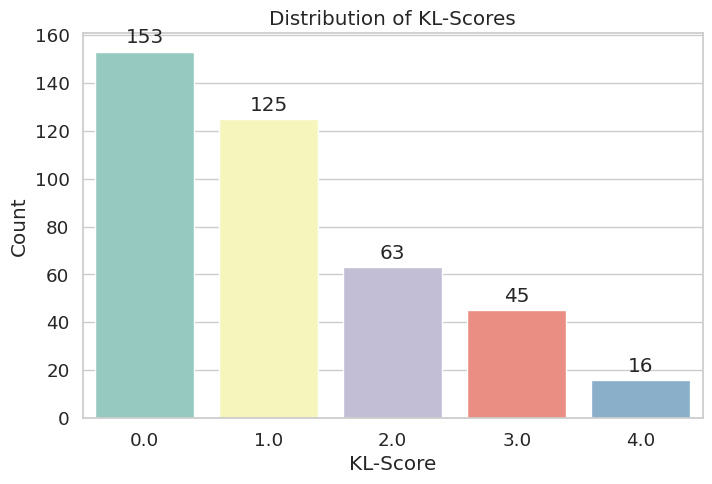

In [187]:

sns.set_theme(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(8, 5))

ax = sns.countplot(data=kl_new, x='KL-Score', palette='Set3')
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.xlabel("KL-Score")
plt.ylabel("Count")
plt.title("Distribution of KL-Scores")

plt.show()

In [188]:
kl_new.columns

Index(['record_id', 'visit', 'side', 'pain', 'age', 'ce_height', 'ce_weight',
       'ce_bmi', 'ce_fm', 'gender', 'OKS_score', 'UCLA_score', 'FJS_score',
       'KOOS_pain', 'KOOS_symptoms', 'KOOS_sport', 'KOOS_adl', 'KOOS_qol',
       'name', 'KL-Score', 'oks_q1', 'oks_q2', 'oks_q3', 'oks_q4', 'oks_q5',
       'oks_q6', 'oks_q7', 'oks_q8', 'oks_q9', 'oks_q10', 'oks_q11', 'oks_q12',
       'koos_s1', 'koos_s2', 'koos_s3', 'koos_s4', 'koos_s5', 'koos_s6',
       'koos_s7', 'koos_p1', 'koos_p2', 'koos_p3', 'koos_p4', 'koos_p5',
       'koos_p6', 'koos_p7', 'koos_p8', 'koos_p9', 'koos_a1', 'koos_a2',
       'koos_a3', 'koos_a4', 'koos_a5', 'koos_a6', 'koos_a7', 'koos_a8',
       'koos_a9', 'koos_a10', 'koos_a11', 'koos_a12', 'koos_a13', 'koos_a14',
       'koos_a15', 'koos_a16', 'koos_a17', 'koos_sp1', 'koos_sp2', 'koos_sp3',
       'koos_sp4', 'koos_sp5', 'koos_q1', 'koos_q2', 'koos_q3', 'koos_q4'],
      dtype='object')

# Prep & Save Dataframe

In [38]:
kl_new.to_csv(os.path.join(save_dir, 'inmodi_data_questionnaire_kl_woSC.csv'))

In [39]:
df = kl_new
# Replace Nan values with -1
df[columnstk] = df[columnstk].fillna(-1)

In [40]:
df.to_csv(os.path.join(save_dir, 'inmodi_data_questionnaire_kl_woSC_woNAN.csv'))